# Assignment 1 - Experiments with Machine Learning
Alice Chen
Georgia Pitic
Ryan Kim

Path: deliverable.ipynb

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier

### 1. Load Data

In [4]:
# a. methods of convertion
# i. Convert dummy coded data

dataAbalone = pd.read_csv('abalone.csv')
dataPenguins = pd.read_csv('penguins.csv')
dataPenguins = pd.get_dummies(dataPenguins, columns=['island', 'sex'])
dataPenguins.to_csv('penguins_with_dummies.csv', index=False)

dataPenguinsWithDummy = pd.read_csv('penguins_with_dummies.csv')


### 2. Plot the percentages of each class

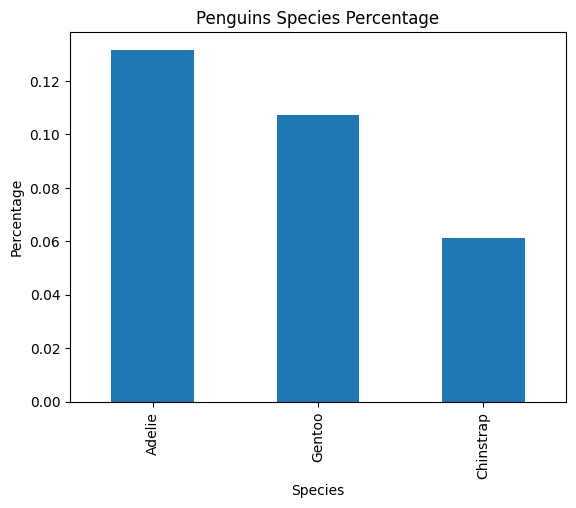

In [5]:
# Penguines plot percentage
dataPenguinsPercentage = (dataPenguinsWithDummy['species'].value_counts(
    normalize=True) / len(dataPenguinsWithDummy)) * 100

dataPenguinsPercentage.plot(kind='bar')
plt.title('Penguins Species Percentage')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.savefig('penguinsPercentage.png')
plt.show()

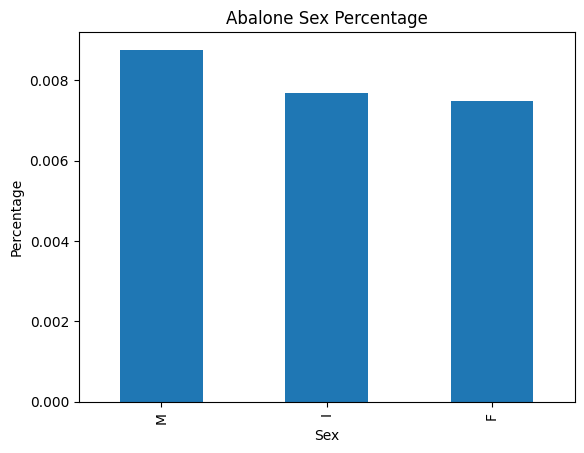

In [6]:
# Abalone plot percentage
dataAbalonePercentage = (dataAbalone['Type'].value_counts(
    normalize=True) / len(dataAbalone)) * 100

dataAbalonePercentage.plot(kind='bar')
plt.title('Abalone Sex Percentage')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('abalonePercentage.png')
plt.show()

### 3. Split dataset using train test split

In [7]:
# a. Penguins
X_penguins = dataPenguinsWithDummy.drop(['species'], axis=1)
y_penguins = dataPenguinsWithDummy['species']
X_penguinsTrain, X_penguinsTest, y_penguinsTrain, y_penguinsTest = train_test_split(X_penguins, y_penguins)

# b. Abalone
X_abalone = dataAbalone.drop(['Type'], axis=1)
y_abalone = dataAbalone['Type']
X_abaloneTrain, X_abaloneTest, y_abaloneTrain, y_abaloneTest = train_test_split(X_abalone, y_abalone)

### 4. Train and test 4 different classifiers

#### 4a Base DT

[Text(0.5769230769230769, 0.9, 'x[2] <= 206.5\ngini = 0.643\nsamples = 249\nvalue = [106, 53, 90]'),
 Text(0.3076923076923077, 0.7, 'x[0] <= 43.35\ngini = 0.439\nsamples = 154\nvalue = [104, 50, 0]'),
 Text(0.15384615384615385, 0.5, 'x[0] <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.23076923076923078, 0.3, 'x[2] <= 189.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.46153846153846156, 0.5, 'x[1] <= 20.15\ngini = 0.078\nsamples = 49\nvalue = [2, 47, 0]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8461538461538461, 0.7, 'x[4] <= 0.5\ngini = 0.101\nsamples = 95\nvalue = [2, 3, 90]'),
 Text(0.769230

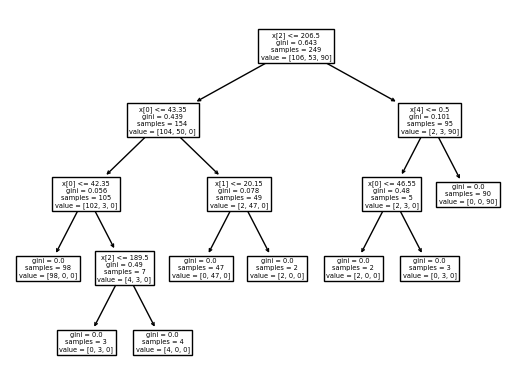

In [8]:
dtc_penguins = tree.DecisionTreeClassifier()
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)

# i. Penguins
dtc_penguins.fit(X_penguinsTrain, y_penguinsTrain)
tree.plot_tree(dtc_penguins)

[Text(0.5, 0.9, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [1000, 980, 1152]'),
 Text(0.25, 0.7, 'x[7] <= 8.5\ngini = 0.543\nsamples = 1285\nvalue = [210, 795, 280]'),
 Text(0.125, 0.5, 'x[6] <= 0.127\ngini = 0.392\nsamples = 853\nvalue = [68, 647, 138]'),
 Text(0.0625, 0.3, 'x[2] <= 0.113\ngini = 0.302\nsamples = 614\nvalue = [29, 506, 79]'),
 Text(0.03125, 0.1, 'gini = 0.275\nsamples = 556\nvalue = [19, 468, 69]'),
 Text(0.09375, 0.1, 'gini = 0.511\nsamples = 58\nvalue = [10, 38, 10]'),
 Text(0.1875, 0.3, 'x[0] <= 0.483\ngini = 0.564\nsamples = 239\nvalue = [39, 141, 59]'),
 Text(0.15625, 0.1, 'gini = 0.63\nsamples = 114\nvalue = [25, 55, 34]'),
 Text(0.21875, 0.1, 'gini = 0.474\nsamples = 125\nvalue = [14, 86, 25]'),
 Text(0.375, 0.5, 'x[4] <= 0.135\ngini = 0.667\nsamples = 432\nvalue = [142, 148, 142]'),
 Text(0.3125, 0.3, 'x[2] <= 0.122\ngini = 0.584\nsamples = 82\nvalue = [12, 25, 45]'),
 Text(0.28125, 0.1, 'gini = 0.607\nsamples = 75\nvalue = [12, 25, 38]'),
 Text(0.3

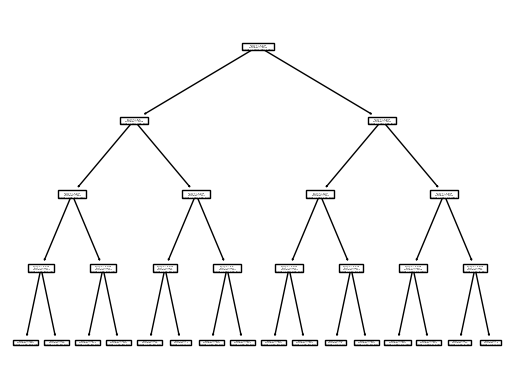

In [9]:
# ii. Abalone
dtc_abalone.fit(X_abaloneTrain, y_abaloneTrain)
tree.plot_tree(dtc_abalone)

#### 4b Top DT

In [10]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

# i. Penguins
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=params_grid)

grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
best_dt_classifier = grid_search_penguins.best_estimator_

best_dt_classifier.fit(X_penguinsTest, y_penguinsTest)
# tree.plot_tree(grid_search.best_estimator_)

# FOR LATER IN STEP 6
# accuracy = best_dt_classifier.score(X_penguinsTrain, y_penguinsTrain)
# print('Penguins Decision Tree Accuracy: ', accuracy)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [11]:
# ii. Abalone

topDTC_abalone = tree.DecisionTreeClassifier(max_depth=6)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
best_dt_classifier = grid_search_abalone.best_estimator_

best_dt_classifier.fit(X_abaloneTest, y_abaloneTest)
# FOR LATER IN STEP 6
# accuracy = best_dt_classifier.score(X_abaloneTest, y_abaloneTest)
# print('Penguins Decision Tree Accuracy: ', accuracy)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### 4c Base MLP

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

# i. Penguins
clf.fit(X_penguinsTrain, y_penguinsTrain)
clf.score(X_penguinsTest, y_penguinsTest)


0.47619047619047616

In [13]:
# ii. Abalone
clf.fit(X_abaloneTrain, y_abaloneTrain)
clf.score(X_abaloneTest, y_abaloneTest)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.3598086124401914

#### 4d Top MLP

In [37]:
# d. TOP MLP
# i. Penguins

# Define the MLPClassifier
mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=10000000)

# Perform grid search
grid_search_mlp_penguins = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain)  # Replace with your training data variables

# Output the best parameters
print("Best parameters set found on development set:")
print(grid_search_mlp_penguins.best_params_)

# After fitting GridSearchCV to your data
best_score = grid_search_mlp_penguins.best_score_

# Print the best score
print(best_score)


Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
0.6827309236947792


In [38]:
# d. TOP MLP
# ii. Abalons

# Define the MLPClassifier
mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=10000000)

# Perform grid search
grid_search_mlp_abalone = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)  # Replace with your training data variables

# Output the best parameters
print("Best parameters set found on development set:")
print(grid_search_mlp_abalone.best_params_)

# After fitting GridSearchCV to your data
best_score = grid_search_mlp_abalone.best_score_

# Print the best score
print(best_score)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.5443805874840358


5 

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def evaluate_model(title, classifier, X_train, y_train, X_test, y_test, file_name):
    # Fit the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    predictions = classifier.predict(X_test)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    f1_macro = f1_score(y_test, predictions, average='macro')
    f1_weighted = f1_score(y_test, predictions, average='weighted')
    
    # Write to file
    with open(file_name, 'a') as file:
        # (A) Model Description
        file.write(f"\n{'*' * 40}\n")
        file.write(f"Model: {title}\n")
        if hasattr(classifier, 'best_params_'):
            file.write(f"Best Parameters: {classifier.best_params_}\n")
        
        # (B) Confusion Matrix
        file.write("Confusion Matrix:\n")
        file.write(f"{np.array2string(cm)}\n")
        
        # (C) Classification Report
        file.write("Classification Report:\n")
        file.write(f"{classification_report(y_test, predictions)}\n")
        
        # (D) Accuracy and F1 Scores
        file.write(f"Accuracy: {accuracy:.4f}\n")
        file.write(f"Macro-average F1: {f1_macro:.4f}\n")
        file.write(f"Weighted-average F1: {f1_weighted:.4f}\n")
        file.write(f"{'*' * 40}\n")

# Base-DT
dtc_penguins = tree.DecisionTreeClassifier()
evaluate_model('Base-DT Penguins', dtc_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, 'penguin-performance.txt')

# Top-DT
evaluate_model('Top-DT Penguins', grid_search_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, 'penguin-performance.txt')

# Base-MLP
base_mlp_penguins = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
evaluate_model('Base-MLP Penguins', base_mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, 'penguin-performance.txt')

# Top-MLP
evaluate_model('Top-MLP Penguins', grid_search_mlp_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, 'penguin-performance.txt')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [40]:
# FOR ABALONE
# Base-DT
dtc_abalone = tree.DecisionTreeClassifier()
evaluate_model('Base-DT Abalone', dtc_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, 'abalone-performance.txt')

# Top-DT
evaluate_model('Top-DT Abalone', grid_search_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, 'abalone-performance.txt')

# Base-MLP
base_mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
evaluate_model('Base-MLP Abalone', base_mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, 'abalone-performance.txt')

# Top-MLP
evaluate_model('Top-MLP Abalone', grid_search_mlp_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, 'abalone-performance.txt')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.

#6

In [41]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming evaluate_model is a function that trains, predicts, and evaluates the model
# and returns a dictionary with accuracy, macro F1, and weighted F1.

def run_experiments(model, X_train, y_train, X_test, y_test):
    accuracies = []
    macro_f1s = []
    weighted_f1s = []
    
    # Run 5 experiments
    for i in range(5):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions, output_dict=True)
        
        accuracies.append(accuracy)
        macro_f1s.append(report['macro avg']['f1-score'])
        weighted_f1s.append(report['weighted avg']['f1-score'])
        
    # Calculate the means and variances
    accuracy_mean, accuracy_var = np.mean(accuracies), np.var(accuracies)
    macro_f1_mean, macro_f1_var = np.mean(macro_f1s), np.var(macro_f1s)
    weighted_f1_mean, weighted_f1_var = np.mean(weighted_f1s), np.var(weighted_f1s)
    
    # Return the results as a dictionary
    return {
        'accuracy_mean': accuracy_mean, 'accuracy_var': accuracy_var,
        'macro_f1_mean': macro_f1_mean, 'macro_f1_var': macro_f1_var,
        'weighted_f1_mean': weighted_f1_mean, 'weighted_f1_var': weighted_f1_var
    }

# Function to calculate the mean and variance of the evaluation metrics
def calculate_mean_variance(results):
    mean_variance = {}
    for key, value in results.items():
        mean_variance[f'{key}_mean'] = np.mean(value)
        mean_variance[f'{key}_var'] = np.var(value)
    return mean_variance

def append_to_file(filename, model_name, results):
    with open(filename, 'a') as file:
        file.write(f'\n--- {model_name} ---\n')
        for metric, value in results.items():
            file.write(f'{metric}: {value}\n')

# Base DT Penguins
base_dt_penguins = tree.DecisionTreeClassifier()
results = run_experiments(base_dt_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file('performance.txt', base_dt_penguins.__class__.__name__, results)

# Top-DT for Penguins
params_grid_top_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

top_dt_penguins = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params_grid_top_dt, scoring='accuracy', cv=5)
top_dt_penguins.fit(X_penguinsTrain, y_penguinsTrain)
best_dt_penguins = top_dt_penguins.best_estimator_

penguin_metrics = run_experiments(best_dt_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
penguin_results = calculate_mean_variance(penguin_metrics)
append_to_file('penguin-performance.txt', 'Top-DT', penguin_results)

# Base-MLP for Penguins
base_mlp_penguins = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
penguin_metrics = run_experiments(base_mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
penguin_results = calculate_mean_variance(penguin_metrics)
append_to_file('penguin-performance.txt', 'Base-MLP', penguin_results)

# Top-MLP for Penguins
mlp_param_grid_top_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}

top_mlp_penguins = GridSearchCV(MLPClassifier(max_iter=1000), param_grid=mlp_param_grid_top_mlp, scoring='accuracy', cv=5)
top_mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain)
best_mlp_penguins = top_mlp_penguins.best_estimator_

penguin_metrics = run_experiments(best_mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
penguin_results = calculate_mean_variance(penguin_metrics)
append_to_file('penguin-performance.txt', 'Top-MLP', penguin_results)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [42]:
# 6 for ABALONE

# Base-DT for Abalone
base_dt_abalone = tree.DecisionTreeClassifier()
results = run_experiments(base_dt_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file('abalone-performance.txt', base_dt_abalone.__class__.__name__, results)

# Top-DT for Abalone
params_grid_top_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

top_dt_abalone = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params_grid_top_dt, scoring='accuracy', cv=5)
top_dt_abalone.fit(X_abaloneTrain, y_abaloneTrain)
best_dt_abalone = top_dt_abalone.best_estimator_

abalone_metrics = run_experiments(best_dt_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
abalone_results = calculate_mean_variance(abalone_metrics)
append_to_file('abalone-performance.txt', 'Top-DT', abalone_results)

# Base-MLP for Abalone
base_mlp_abalone = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
abalone_metrics = run_experiments(base_mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
abalone_results = calculate_mean_variance(abalone_metrics)
append_to_file('abalone-performance.txt', 'Base-MLP', abalone_results)

# Top-MLP for Abalone
mlp_param_grid_top_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}

top_mlp_abalone = GridSearchCV(MLPClassifier(max_iter=1000), param_grid=mlp_param_grid_top_mlp, scoring='accuracy', cv=5)
top_mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)
best_mlp_abalone = top_mlp_abalone.best_estimator_

abalone_metrics = run_experiments(best_mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
abalone_results = calculate_mean_variance(abalone_metrics)
append_to_file('abalone-performance.txt', 'Top-MLP', abalone_results)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
